# Customer segmentation

This notebook is focus on exploring and cleaning the data for the test data.

## 1. Data Understanding

Structure of the data:

* **Features**:
  * **ID**: Unique ID
  * **Gender**: Gender
  * **Ever_Married**: Marital status of the customer
  * **Age**: Age
  * **Graduated**: Is the customer a graduate?
  * **Profession**: Profession of the customer
  * **Work_Experience**: Work Experience in years
  * **Spending_Score**: Spending Score
  * **Family_Size**: Family Size
  * **Var_1**: Category for the customer

Link: <https://www.kaggle.com/datasets/abisheksudarshan/customer-segmentation>

## 2. Data exploration

### 2.1. Review the state of the data

This is a first glance over the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
plt.style.use('ggplot')

In [3]:
PATH_DATA = os.path.join(os.getenv("PATH_DATA_PROJECTS"), "Tabular", "customer_segmentation")

In [4]:
df_test = pd.read_csv(os.path.join(PATH_DATA, "test.csv"))
print("Shape:", df_test.shape)
df_test.head()

Shape: (2627, 10)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [6]:
print("Total missing by columns:")
df_test.isnull().sum()

Total missing by columns:


ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

#### 2.1.1. Categorical

In [7]:
categorical_features = ["Gender", "Ever_Married", "Graduated", "Profession", "Spending_Score", "Var_1"]

In [8]:
for c in categorical_features:
    print("\nFeature:", c)
    print(df_test[c].unique())


Feature: Gender
['Female' 'Male']

Feature: Ever_Married
['Yes' 'No' nan]

Feature: Graduated
['Yes' 'No' nan]

Feature: Profession
['Engineer' 'Healthcare' nan 'Executive' 'Marketing' 'Doctor' 'Artist'
 'Lawyer' 'Entertainment' 'Homemaker']

Feature: Spending_Score
['Low' 'Average' 'High']

Feature: Var_1
['Cat_6' 'Cat_4' 'Cat_3' nan 'Cat_1' 'Cat_2' 'Cat_5' 'Cat_7']


#### 2.1.2. Numeric

In [9]:
numeric_features = ["Age", "Work_Experience", "Family_Size"]
df_test[numeric_features].describe()

,Age,Work_Experience,Family_Size
count,2627.000000,2358.000000,2514.000000
mean,43.649791,2.552587,2.825378
std,16.967015,3.341094,1.551906
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,41.000000,1.000000,2.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


#### 2.1.3. Conclusion

* There are missing values.
* The categorical features have few classes per feature.
* The numeric features are in different scales.
* According to data source information, the feature ID is unique, so it does not help for training. It is necessary to remove it.

### 2.2. Data cleaning

Based on initial conclusions, it is necessary to apply data cleaning.

#### 2.2.1. Categorical

Replace missing values with most frequent classes.

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
si = SimpleImputer(strategy = "most_frequent")
ar = si.fit_transform(df_test[categorical_features])
df_test_Categorical = pd.DataFrame(ar, columns = categorical_features)

for f in categorical_features:
    df_test[f] = df_test_Categorical[f]

df_test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,Artist,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


#### 2.2.2. Numeric

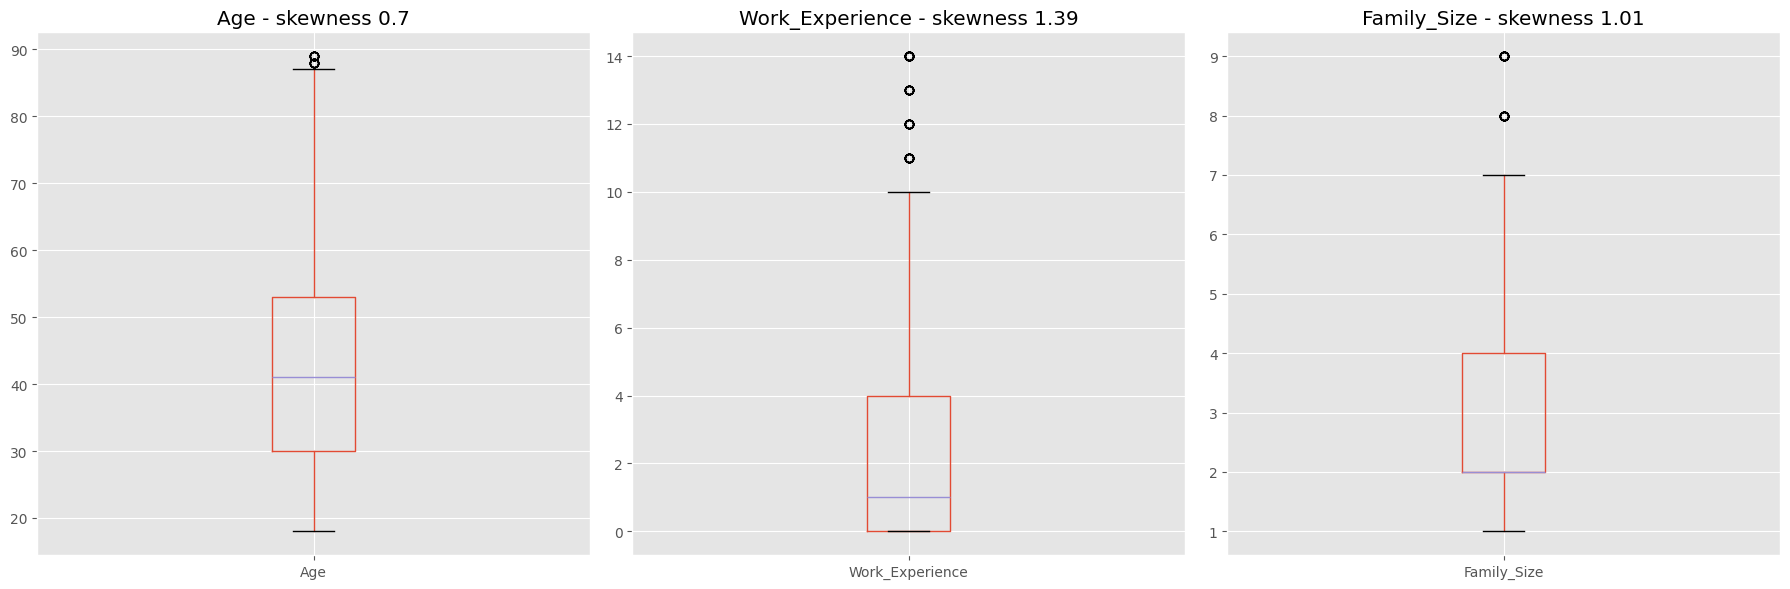

In [12]:
fig, axes = plt.subplots(1, 3, figsize = (18, 6))

for ax, f in zip(axes, numeric_features):
    df_test.boxplot(column = f, ax = ax)
    ax.set_title(f"{f} - skewness {df_test[f].skew().round(2)}")

plt.tight_layout()
plt.show()

In [13]:
for f in numeric_features:
    df_test[f] = df_test[f].fillna(df_test[f].median())

print("Total missing by columns:")
df_test[numeric_features].isnull().sum()

Total missing by columns:


Age                0
Work_Experience    0
Family_Size        0
dtype: int64

In [14]:
print("Total missing by columns:")
df_test.isnull().sum()

Total missing by columns:


ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

### 2.3. Exploratory Data Analysis (EDA)

Explore the data distribucion.

#### 2.3.1. Categorical

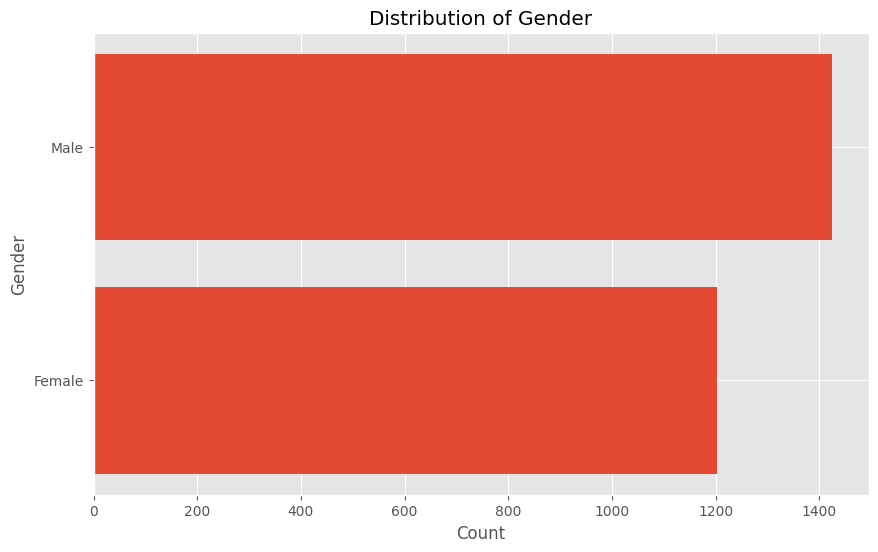

In [15]:
gender_count = df_test["Gender"].value_counts()

plt.figure(figsize = (10, 6))
plt.barh(gender_count.index, gender_count.values)
plt.xlabel("Count")
plt.ylabel("Gender")
plt.title("Distribution of Gender")
plt.gca().invert_yaxis()
plt.show()

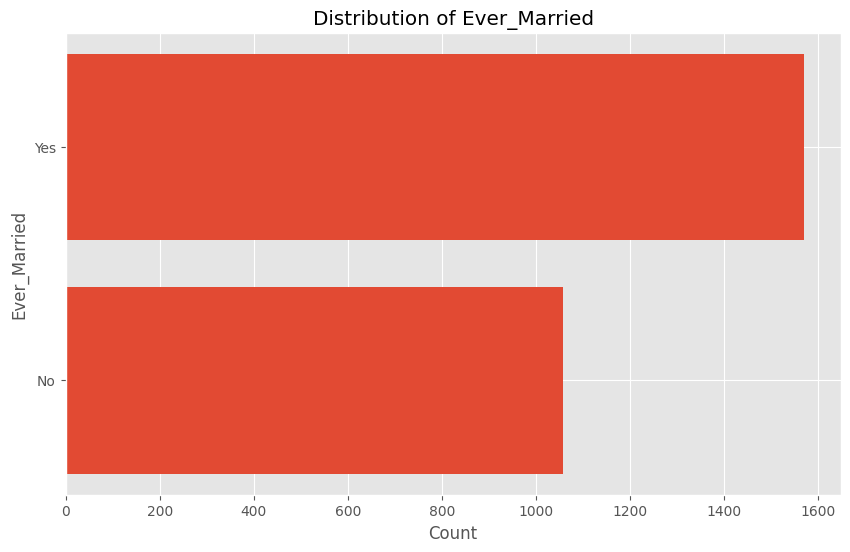

In [16]:
ever_married_count = df_test["Ever_Married"].value_counts()

plt.figure(figsize = (10, 6))
plt.barh(ever_married_count.index, ever_married_count.values)
plt.xlabel("Count")
plt.ylabel("Ever_Married")
plt.title("Distribution of Ever_Married")
plt.gca().invert_yaxis()
plt.show()

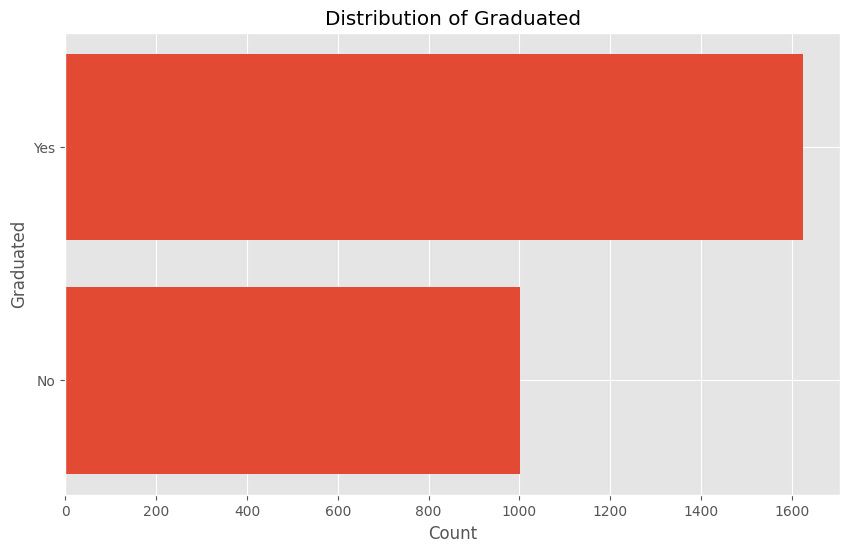

In [17]:
graduated_count = df_test["Graduated"].value_counts()

plt.figure(figsize = (10, 6))
plt.barh(graduated_count.index, graduated_count.values)
plt.xlabel("Count")
plt.ylabel("Graduated")
plt.title("Distribution of Graduated")
plt.gca().invert_yaxis()
plt.show()

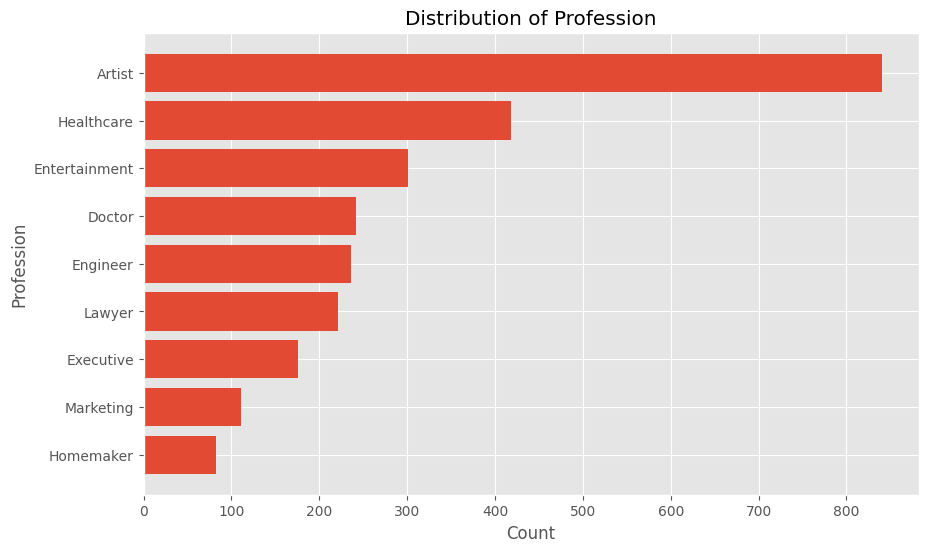

In [18]:
profession_count = df_test["Profession"].value_counts()

plt.figure(figsize = (10, 6))
plt.barh(profession_count.index, profession_count.values)
plt.xlabel("Count")
plt.ylabel("Profession")
plt.title("Distribution of Profession")
plt.gca().invert_yaxis()
plt.show()

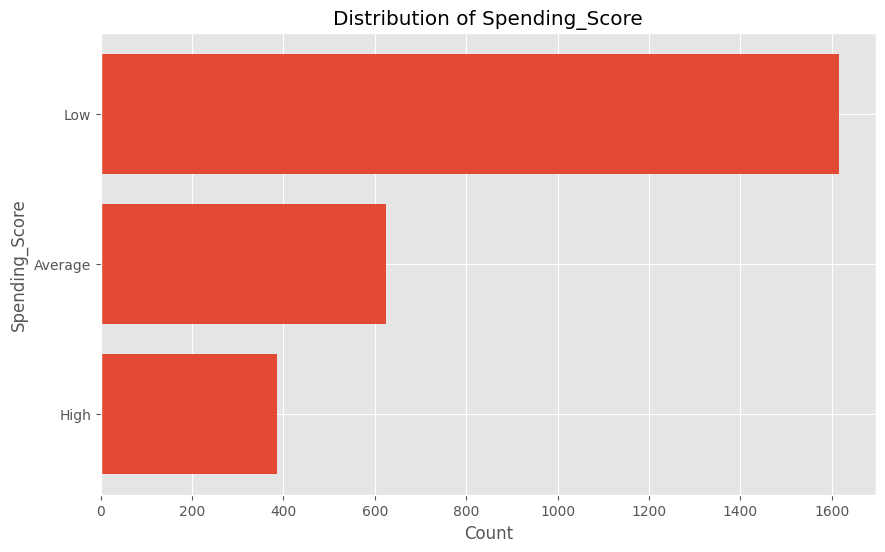

In [19]:
spending_score_count = df_test["Spending_Score"].value_counts()

plt.figure(figsize = (10, 6))
plt.barh(spending_score_count.index, spending_score_count.values)
plt.xlabel("Count")
plt.ylabel("Spending_Score")
plt.title("Distribution of Spending_Score")
plt.gca().invert_yaxis()
plt.show()

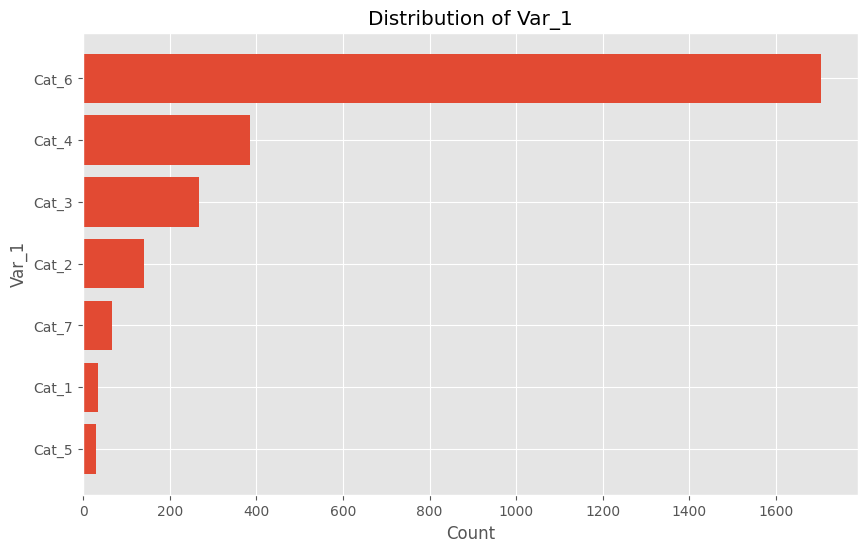

In [20]:
var_1_count = df_test["Var_1"].value_counts()

plt.figure(figsize = (10, 6))
plt.barh(var_1_count.index, var_1_count.values)
plt.xlabel("Count")
plt.ylabel("Var_1")
plt.title("Distribution of Var_1")
plt.gca().invert_yaxis()
plt.show()

#### 2.3.2. Numerical

Explore data correlation.

In [21]:
df_test[numeric_features].describe()

,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2627.000000
mean,43.649791,2.393605,2.789874
std,16.967015,3.200165,1.527360
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,41.000000,1.000000,2.000000
75%,53.000000,3.000000,4.000000
max,89.000000,14.000000,9.000000


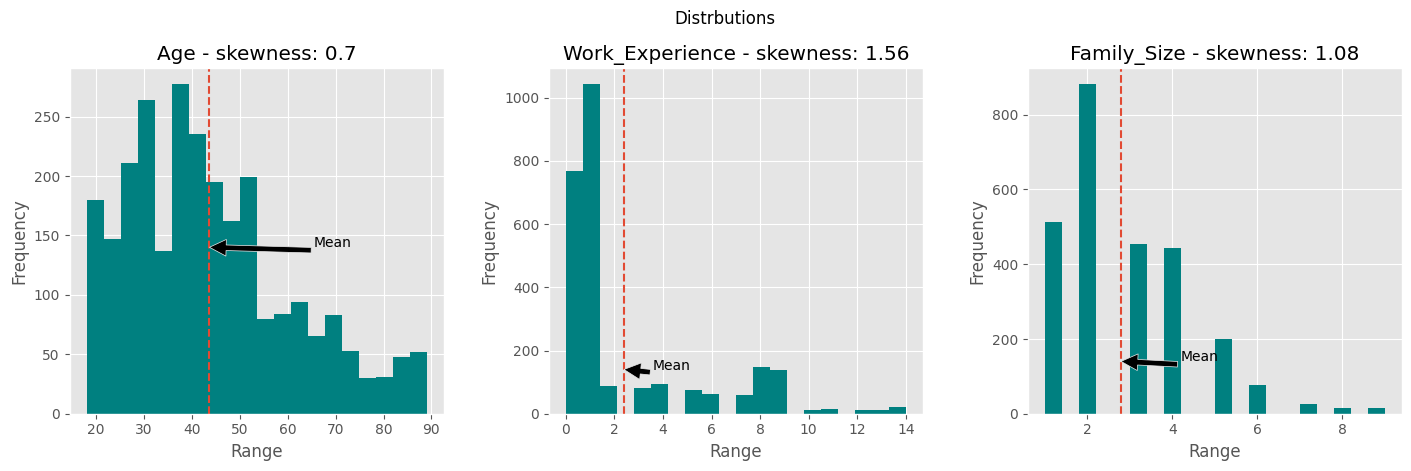

In [22]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5))
fig.tight_layout(pad = 4.5)
fig.suptitle("Distrbutions")

for ax, f in zip(axes, numeric_features):
    ax.hist(df_test[f], bins = 20, color = "teal")
    ax.set_title(f"{f} - skewness: {df_test[f].skew().round(2)}")
    ax.set_ylabel("Frequency")
    ax.set_xlabel("Range")
    ax.axvline(x = df_test[f].mean(), linestyle = "dashed")
    ax.annotate("Mean", xy = (df_test[f].mean(), 140), xytext=(df_test[f].mean()*1.5, 140), arrowprops = dict(facecolor = "black"))
    
plt.show()

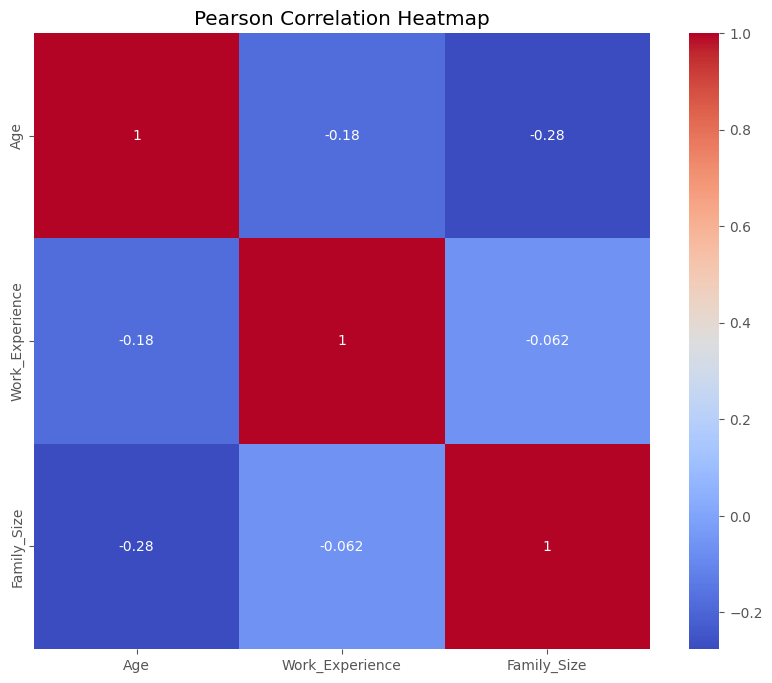

In [23]:
correlation_matrix = df_test[numeric_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", square = True)
plt.title("Pearson Correlation Heatmap")
plt.show()

#### 2.3.3. Save file

In [24]:
path_csv_clean = "test_cleaned.csv"
df_test.drop(["ID"], axis = 1, inplace = True)
df_test.to_csv(os.path.join(PATH_DATA, path_csv_clean), index = False)